Any mass can lead to a gravitational potential in 3-D (X-Y-Z) space.
ρ
We will set G=1 for this problem. Please solve the potential of a line
mass (i.e. one zone at x=50, y=50 with nonzero density and all others
with zero density) using SOR. Since the problem has symmetry in the Z
direction:
The domain is X from 0 to 100, Y from 0 to 100. Δx= Δy=1.
Please verify that the potential has radial dependence close to
2*G*μ*ln(r)+constant. Where μ is its mass per unit length and r is the
distance to the line mass.

boundaries are set to potential = 0

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [225]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""
   

const = 4*np.pi
density = 10.
Nmax = 100
rho = np.zeros((Nmax,Nmax),float)
V = np.zeros((Nmax,Nmax),float)
rho[50,50] = density


omega=1.8

from mpl_toolkits.mplot3d import Axes3D
Nmax = 100
Niter = 5000
    
for iter in range(Niter):                                  
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-np.pi*rho[i,j]-V[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
            V[i,j] = V[i,j] + omega*du 
    print(maxerr)
    if(maxerr<1.e-4):
        break
            
                                            # Show fig

0
31.41592653589793
14.137166941154069
12.723450247038663
8.588328916751099
7.729496025075989
5.797122018806992
5.217409816926293
4.108710230829455
3.69783920774651
2.995249758274673
10
2.695724782447206
2.2239729455189448
2.0015756509670504
1.6727453654510351
1.5054708289059318
1.27024101188938
1.1432169107004422
0.9717343740953759
0.8745609366858383
0.7477496008663918
20
0.6729746407797526
0.5781463959426056
0.520331756348345
0.44878613985044763
0.40390752586540285
0.34953535892198323
0.31458182302978493
0.2730120821294205
0.24571087391647847
0.21376846030733626
30
0.20068592452583545
0.1925868117950067
0.1865694154520412
0.1796494382314684
0.17444404750322917
0.16843876954285264
0.1638841087205769
0.15870160542547396
0.1545839784465386
0.15005738080432707
40
0.14631748662374022
0.14233814952341817
0.13891277259363477
0.1353825317000492
0.13223622416871805
0.12907131305266262
0.12618190594925238
0.1233206793864845
0.12066440328279171
0.11806015179016782
50
0.11561384996139168
0.11323

0.0033397300569149024
0.0033089664463048507
0.003278486172554551
0.003248286627034247
0.0032183652250168393
0.003188719405699203
0.0031593466317119123
0.003130244389069503
0.003101410186893361
410
0.003072841557298034
0.0030445360550004352
0.0030164912572416824
0.0029887047636307784
0.002961174195775129
0.0029338971971881733
0.002906871433054903
0.0028800945900897545
0.0028535643762239715
0.0028272785205700757
420
0.0028012347730026477
0.0027754309042151704
0.002749864705428706
0.0027245339880579422
0.002699436583760928
0.002674570344161964
0.002649933140581595
0.0026255228639726624
0.0026013374246858234
0.0025773747523558654
430
0.0025536327955322236
0.0025301095217997727
0.002506802917366713
0.00248371098700062
0.002460831753786863
0.0024381632590717572
0.00241570356216414
0.002393450740321157
0.0023714028883574656
0.0023495581187802372
440
0.0023279145613628316
0.00230647036310927
0.002285223688119231
0.002264172717381996
0.0022433156485703876
0.0022226506960123515
0.002202176090477

0.00011184844326805887
0.00011081807008395117
770
0.00010979718894787993
0.00010878571238492896
0.00010778355377283333
0.000106790627235398
0.00010580684779881722
0.00010483213113587908
0.000103866393772023
0.00010290955301428539
0.00010196152685892912
0.00010102223416197376
780
0.00010009159440471649
9.916952794952749e-05


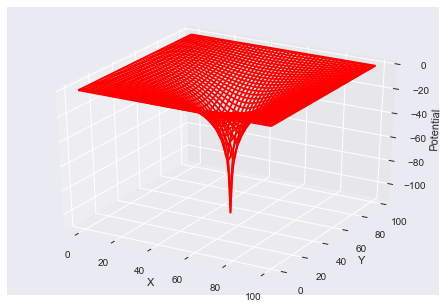

In [213]:
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = np.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = plt.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe1
#ax.plot_surface(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
plt.show()  

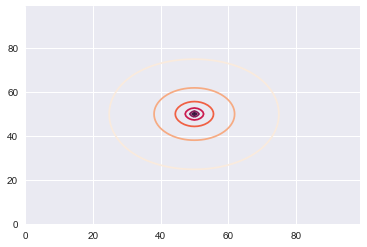

In [214]:
plt.contour(X,Y,Z)

In [215]:
vr = []
r = []
for i in range(0,Nmax):
    for j in range(0,Nmax):
        if i!=50 and j!=50:
            vr.append(V[i,j])
            r.append(np.log(np.sqrt((i-50)**2+(j-50)**2)))

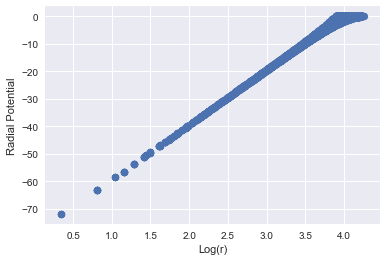

In [222]:
plt.ylabel('Radial Potential')
plt.xlabel('Log(r)')
plt.scatter(r,vr)

In [217]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(r,vr)

In [218]:
r_value**2

0.9889505474454181

In [219]:
slope/2

9.545558248492357

Our R2 is nearly 1 with the slope/2 = density being consistent with our initial conditions